In [82]:
# Data handling
import pandas as pd
import numpy as np


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

# EDA (pandas-profiling, etc. )
import ydata_profiling as pp


# Feature Processing (Scikit-learn processing, etc. )
import sklearn 
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder



# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'ydata_profiling'

In [83]:
df=pd.read_csv("Churn.csv")

In [84]:
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [85]:
df.describe()

,Senior Citizen,tenure,Monthly Charges
count,7044.000000,7044.000000,7044.000000
mean,0.162124,32.366695,64.756736
std,0.368590,24.560582,30.090786
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [69]:
df.shape

(7044, 21)

In [70]:
df.isna().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [71]:
df.duplicated().sum()

0

In [86]:
df.loc[df.Churn == 'Yes','Churn'] = 1
df.loc[df.Churn == 'No','Churn'] = 0

In [87]:
df.loc[df.Gender == 'Female','Gender'] = 1
df.loc[df.Gender == 'Male','Gender'] = 0

In [88]:
cols = ['Online Backup','Streaming Movies','Device Protection','Tech Support','Online Security','Streaming TV']
for i in cols :
    df[i] = df[i].replace({'No internet service': 'No'})

In [89]:
df.replace(['No internet service','No phone service'], 'No', inplace=True)

In [90]:
df['Total Charges'] = df["Total Charges"].replace(" ",np.nan)

In [91]:
df = df[df["Total Charges"].notnull()]
df = df.reset_index()[df.columns]

In [92]:
df['Total Charges'] = df["Total Charges"].astype(float)

In [93]:
df["Churn"].value_counts().values

array([5164, 1869], dtype=int64)

In [94]:
churn_labels = df["Churn"].value_counts().keys().tolist()
churn_values = df["Churn"].value_counts().values.tolist()
plot_data = [go.Pie(labels=churn_labels,
                    values=churn_values,
                    marker=dict(colors=['grey','orange'], line=dict(color="purple",width=1.5)),
                    rotation=90,
                    hoverinfo="label+value+text",
                    hole= .6)   ]                    
plot_layout = go.Layout(dict(title="Customer Churn",
                             plot_bgcolor='rgb(243,243,243)',
                             paper_bgcolor='rgb(243,243,243)')) 
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)  

<Axes: xlabel='Churn', ylabel='count'>

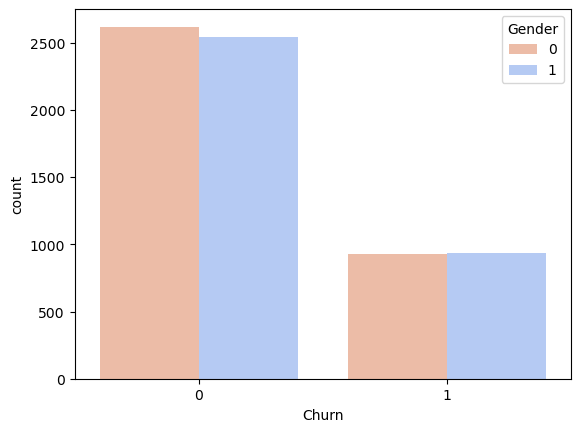

In [95]:
sns.countplot(x='Churn',data=df,hue='Gender',palette="coolwarm_r")

In [96]:
plot_by_gender = df.groupby('Gender').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_gender['Gender'],
    y=plot_by_gender['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Gender',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig) 

In [97]:
plot_by_TechSupport = df.groupby('Tech Support').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_TechSupport['Tech Support'],
    y=plot_by_TechSupport['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by TechSupport',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)  


In [98]:
plot_by_PaymentMethod = df.groupby('Payment Method').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_PaymentMethod['Payment Method'],
    y=plot_by_PaymentMethod['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by PaymentMethod',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)  

In [99]:
plot_by_InternetService = df.groupby('Internet Service').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_InternetService['Internet Service'],
    y=plot_by_InternetService['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by InternetService',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

In [100]:
plot_by_Contract = df.groupby('Contract').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_Contract['Contract'],
    y=plot_by_Contract['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Contract',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

In [101]:
plot_by_tenure = df.groupby('tenure').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_tenure['tenure'],
    y=plot_by_tenure['Churn'],
    
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Tenure',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig) 

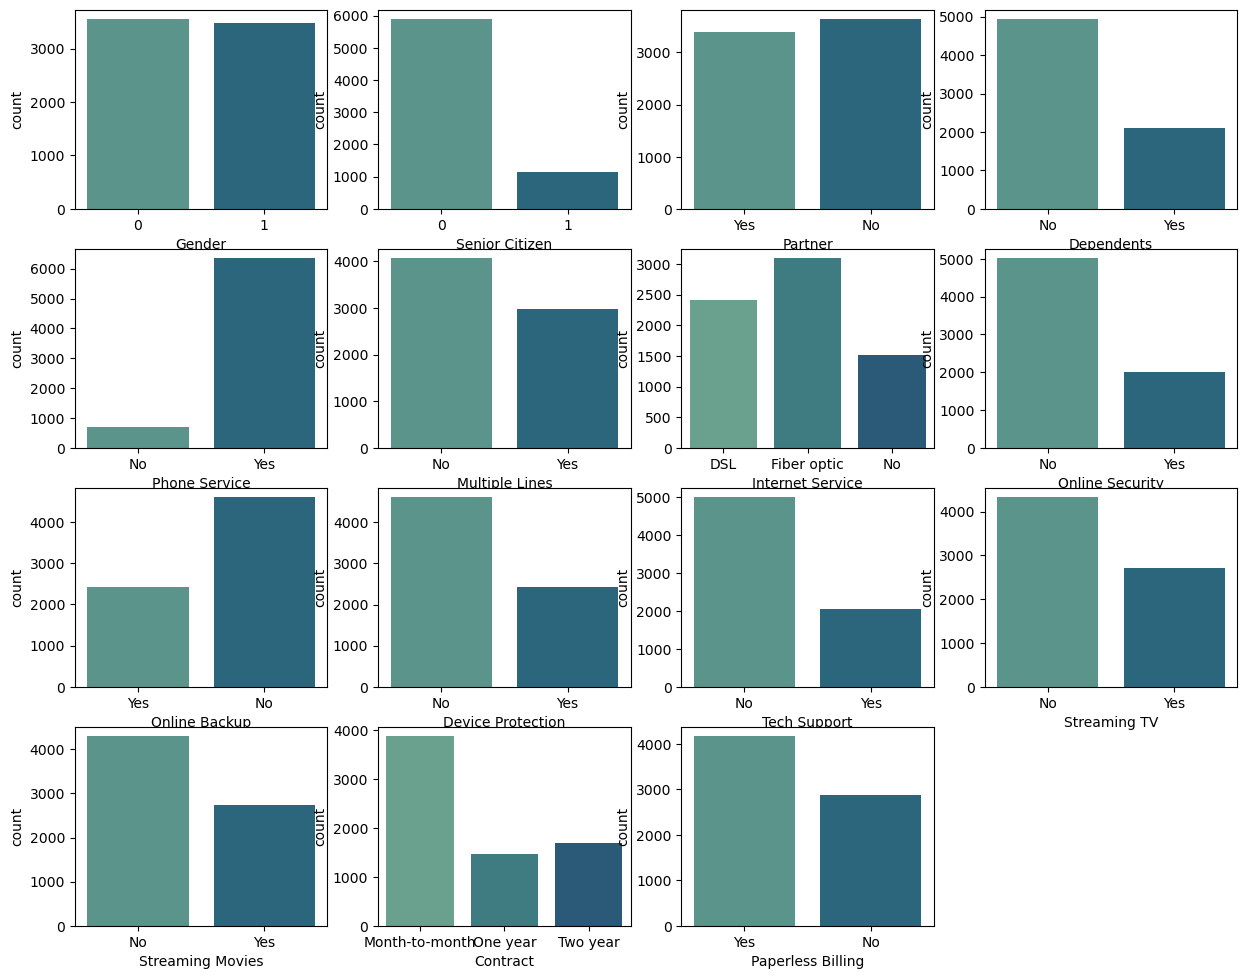

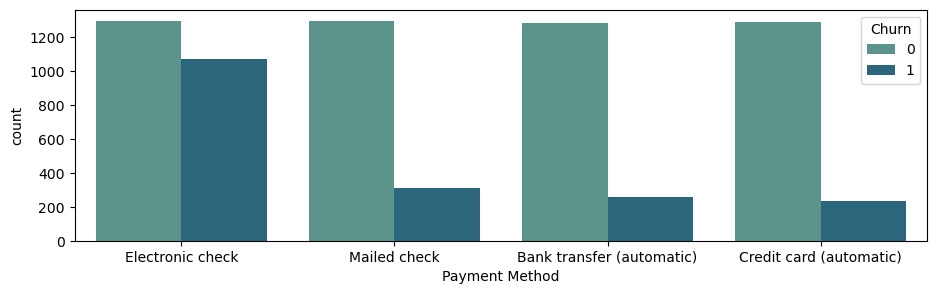

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [102]:
cat_cols = ['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service',
              'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
              'Contract', 'Paperless Billing']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'Payment Method', hue='Churn', data=df, palette='crest')
plt.show() 
plt.tight_layout

<Axes: xlabel='Monthly Charges', ylabel='Total Charges'>

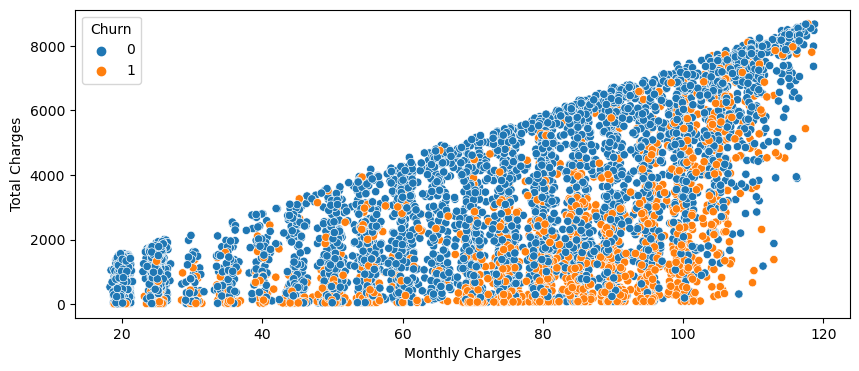

In [103]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='Monthly Charges', y='Total Charges', hue='Churn')

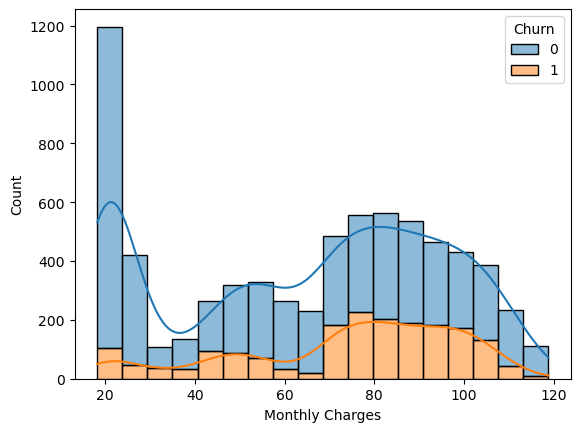

In [104]:
sns.histplot(data=df, x='Monthly Charges', hue='Churn', multiple='stack', kde=True)
plt.show()